![image info](https://ineuron.ai/images/ineuron-logo.png)

### 2.1 Import Data and Required Packages
#### Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [26]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from scipy.special import boxcox1p
from scipy.stats import norm, skew
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

#### Import the CSV Data as Pandas DataFrame

In [2]:
df = pd.read_csv('data/hr_imputed.csv')

#### Show Top 5 Records

In [3]:
df.head()

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,21,Undefined,Pvt Ltd,1,36,1.0
1,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,Small & Medium-org.,Pvt Ltd,5,47,0.0
2,city_21,0.624,Undefined,No relevent experience,Full time course,Graduate,STEM,5,Undefined,Pvt Ltd,0,83,0.0
3,city_115,0.789,Undefined,No relevent experience,no_enrollment,Graduate,Business Degree,0,Undefined,Pvt Ltd,0,52,1.0
4,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,21,Small & Medium-org.,Funded Startup,4,8,0.0


#### Shape of the dataset

In [4]:
df.shape

(19158, 13)

#### Summary of the dataset

- The described method will help to see how data has been spread for numerical values.
- We can clearly see the minimum value, mean values, different percentile values, and maximum values.

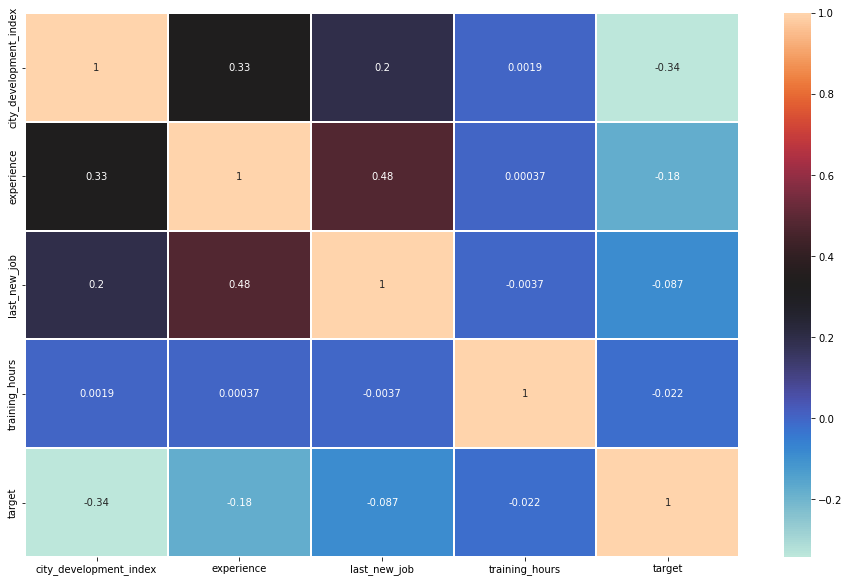

In [5]:
plt.figure(figsize=(16,10))

sns.heatmap(df.corr(),annot=True,cmap='icefire',linewidths=0.2) #data.corr()-->correlation matrix
plt.show()

#### Inference: 
- There is correlation experience and last_new_job.
- We can observe some correlation amoung experience and city_development_index.

In [6]:
features = ['city_development_index','training_hours','experience']
num_df = df[features]

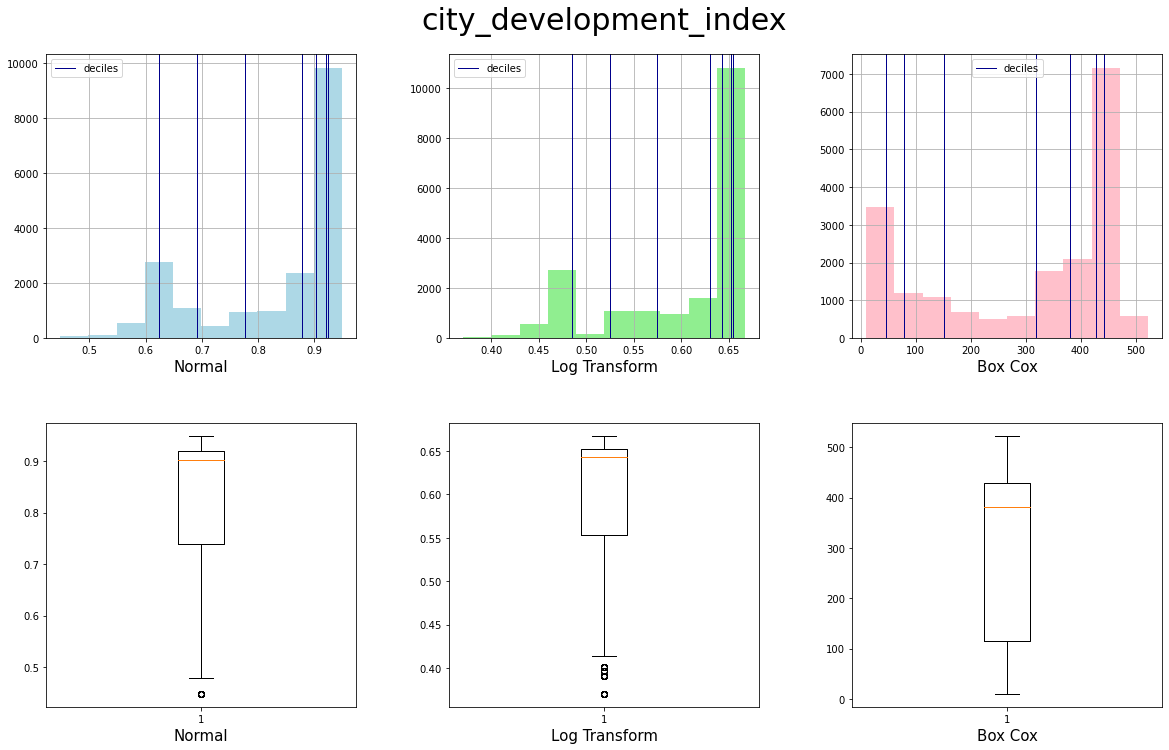

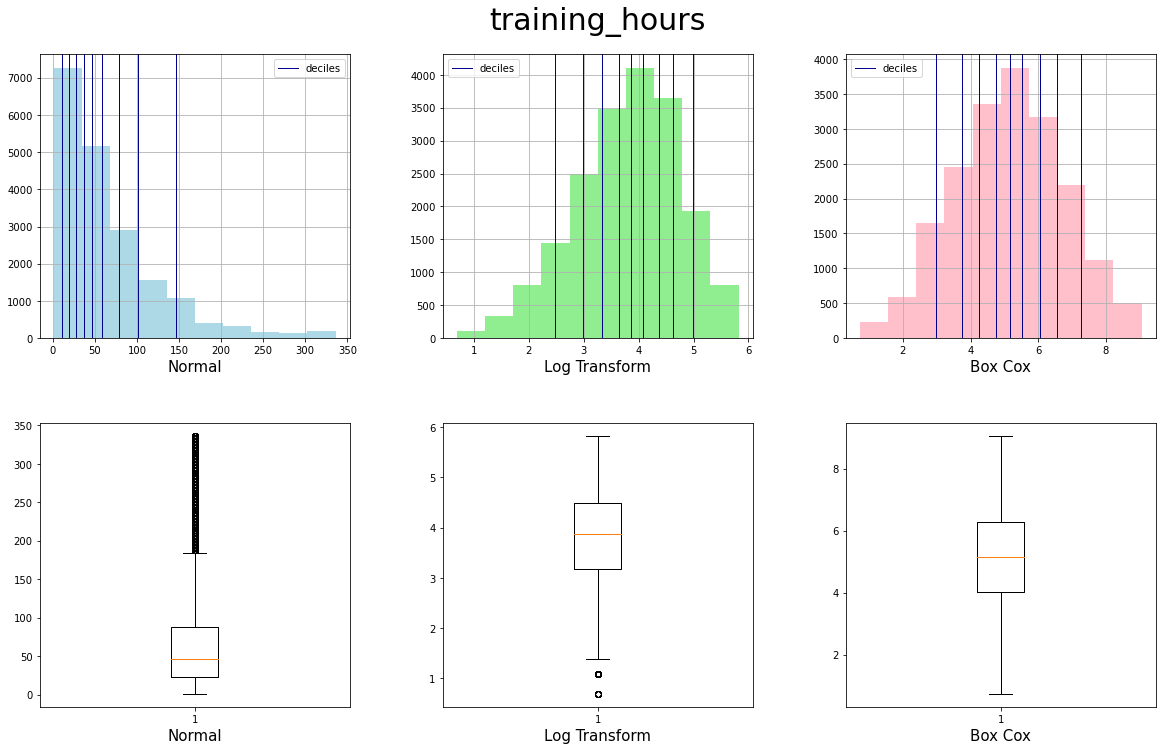

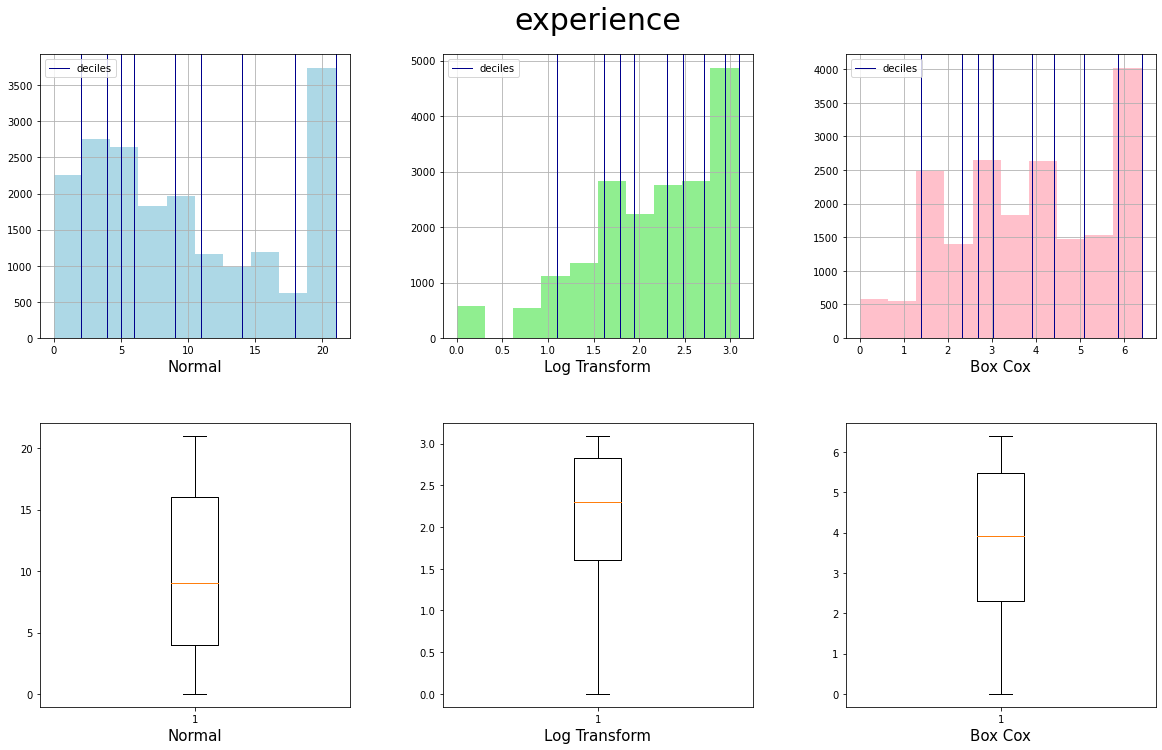

In [7]:
from scipy.stats import boxcox
for col in num_df.columns:
    normal = df[col]
    transforms = [[normal, 'Normal', 'lightblue'], 
                  [(normal+1).transform(np.log), 'Log Transform', 'lightgreen'], 
                  [boxcox(normal+1)[0], 'Box Cox', 'pink']]
    fig, axes = plt.subplots(2, len(transforms), figsize=(20, 12))
    
    for ax in axes[0]:
        transform = transforms[list(axes[0]).index(ax)]
        pd.DataFrame(transform[0]).hist(ax=ax, color=transform[2])
        ax.set_title('')
        ax.set_xlabel(transform[1], fontsize=15)
        
        deciles = pd.Series(transform[0]).quantile([.1, .2, .3, .4, .5, .6, .7, .8, .9])
        for pos in np.array(deciles).reshape(1, -1)[0]:
            handle = ax.axvline(pos, color='darkblue', linewidth=1)
        ax.legend([handle], ['deciles'])
        
    for ax in axes[1]:
        transform = transforms[list(axes[1]).index(ax)]
        ax.boxplot(transform[0])
        ax.set_title('')
        ax.set_xlabel(transform[1], fontsize=15)
        
    axes[0][int(np.floor(len(transforms)/2))].set_title(col, pad=25, fontsize=30)
    plt.show()

#### Insights
- After comparision we can see Box Cox transformation is performing best.
- 'city_development_index', 'experience' and 'training_hours' features should be transformed using box cox

In [8]:
df.info(0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    19158 non-null  object 
 1   city_development_index  19158 non-null  float64
 2   gender                  19158 non-null  object 
 3   relevent_experience     19158 non-null  object 
 4   enrolled_university     19158 non-null  object 
 5   education_level         19158 non-null  object 
 6   major_discipline        19158 non-null  object 
 7   experience              19158 non-null  int64  
 8   company_size            19158 non-null  object 
 9   company_type            19158 non-null  object 
 10  last_new_job            19158 non-null  int64  
 11  training_hours          19158 non-null  int64  
 12  target                  19158 non-null  float64
dtypes: float64(2), int64(3), object(8)
memory usage: 1.9+ MB


BEFORE mu city_development_index : 0.8288480008351603, sigma city_development_index : 0.12335853722992858
AFTER mu city_development_index : -0.09795331486330626, sigma city_development_index : 0.03922455849582262


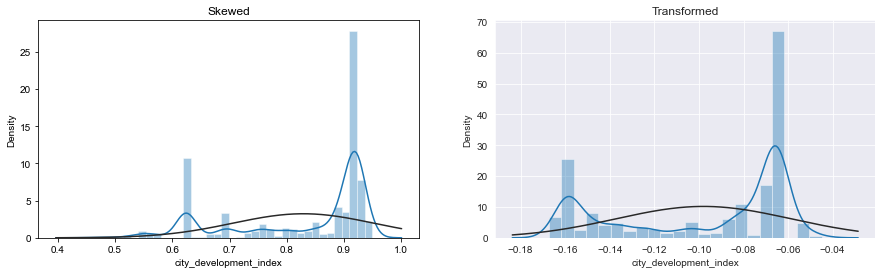

BEFORE mu training_hours : 65.36689633573442, sigma training_hours : 60.05689445297729
AFTER mu training_hours : 5.4525862516067765, sigma training_hours : 1.8519426429645327


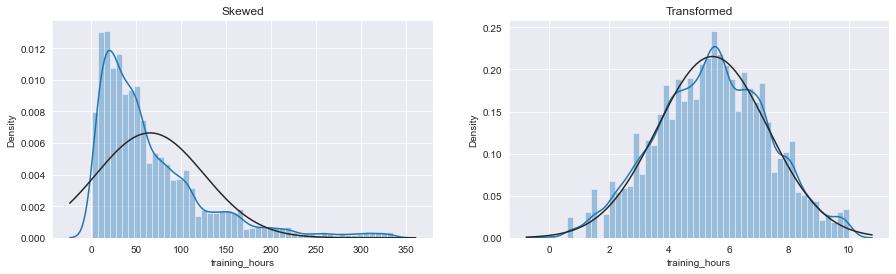

BEFORE mu experience : 10.065873264432613, sigma experience : 6.790786069607247
AFTER mu experience : 3.7103881383352175, sigma experience : 2.244640288042326


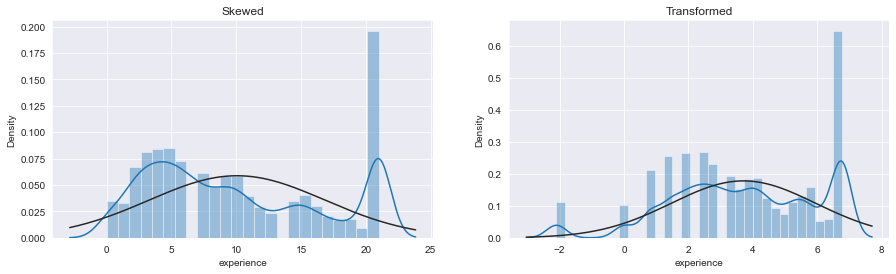

In [9]:
from scipy.stats import norm, skew, boxcox,yeojohnson
for i in features:
    plt.figure(figsize=(15,4))
    plt.subplot(121)
    sns.set_style('darkgrid')
    sns.distplot(df[i], fit = norm)
    plt.title('Skewed')
    (mu, sigma) = norm.fit(df[i])
    print("BEFORE mu {} : {}, sigma {} : {}".format(i, mu, i, sigma))
    
    plt.subplot(122)
    df[i], lam = boxcox(df[i]+0.0001)
    sns.set_style('darkgrid')
    sns.distplot(df[i], fit = norm)
    plt.title('Transformed')
    (mu, sigma) = norm.fit(df[i])
    print("AFTER mu {} : {}, sigma {} : {}".format(i, mu, i, sigma))
    
    plt.show()

In [10]:
df['city_development_index'] = boxcox(df['city_development_index']+1)[0]
df['experience'] = yeojohnson(df['experience']+1)[0]
df['last_new_job'] = (df['last_new_job']+1).transform(np.log)
df['training_hours'] = boxcox(df['training_hours']+1)[0]

#### Type of Features

#### Numerical Features

In [12]:
num_features = [feature for feature in df.columns if df[feature].dtype != 'O']
print('Num of Numerical Features :', len(num_features))
print(num_features)

Num of Numerical Features : 5
['city_development_index', 'experience', 'last_new_job', 'training_hours', 'target']


#### Discrete Features

In [13]:
discrete_features=[feature for feature in num_features if len(df[feature].unique())<=25]
print('Num of Discrete Features :',len(discrete_features))
print(discrete_features)

Num of Discrete Features : 3
['experience', 'last_new_job', 'target']


#### Continuous Features

In [14]:
continuous_features=[feature for feature in num_features if feature not in discrete_features]
print('Num of Continuous Features :',len(continuous_features))
print(continuous_features)

Num of Continuous Features : 2
['city_development_index', 'training_hours']


#### Categorical Features

In [15]:
cat_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print('Num of Categorical Features :', len(cat_features))
print(cat_features)

Num of Categorical Features : 8
['city', 'gender', 'relevent_experience', 'enrolled_university', 'education_level', 'major_discipline', 'company_size', 'company_type']


In [16]:
cat_cols = ['gender', 'relevent_experience', 'enrolled_university', 'education_level', 
            'major_discipline', 'company_size', 'company_type']
ordinal = ['company_size']

In [17]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
df_copy = df.copy()
for col in cat_cols:
    if col in ordinal:
        le = LabelEncoder()
        df_copy[col] = le.fit_transform(df_copy[col])
    else:
        dummies = pd.get_dummies(df_copy[col])
        for d_col in dummies:
            df_copy[col+' '+d_col] = dummies[d_col]
        df_copy = df_copy.drop(col, axis=1)

In [23]:
df_copy['city'] = [int(city[5:]) for city in df_copy['city']]

In [28]:
df_copy.to_csv('data/hr_preprocessed.csv', index = False)